In [17]:
# Common packages and variables
%run "Common Setup.ipynb"

<Figure size 432x288 with 0 Axes>

In [2]:
search_query = ["""
TS=("scale "near/5" issues" OR "maup" OR "spatial "near/5" scale" OR "temporal "near/5" scale" OR "field-scale" 
OR "variability "near/10" scale" OR "scale level" OR "scale "near/5" effect" OR "scale dependent" OR "upscal*" OR 
"downscal*" OR "interface "near/5" combine" OR "computational scale" OR "social scale" OR "social "near/5" networks"
OR "communication "near/5" networks" OR "knowledge "near/5" transfers" OR "social "near/5" capital" OR "human "near/5"
capital" OR "knowledge "near/5" capital" OR "nexus "near/5" issues")
AND WC=("ENVIRONMENTAL SCIENCES" 
         OR "WATER RESOURCES" 
         OR "ENGINEERING ENVIRONMENTAL" 
         OR "INTERDISCIPLINARY APPLICATIONS" 
         OR "ENGINEERING MULTIDISCIPLINARY")
AND SU=("Environmental Sciences & Ecology" OR "Water Resources" OR "Computer Science")
"""]

See [field tags](http://ipscience-help.thomsonreuters.com/wosWebServicesLite/WebServiceOperationsGroup/WebServiceOperations/g2/user_query/field_tags/WOSfieldTags.html) to help construct search parameters
    

## Send query to Clarivate Web of Science servers

In [3]:
replace_cache = False
id_to_query, query_recs = wosis.query(search_query,
                                      replace_cache,
                                      WOS_CONFIG, 
                                      time_span={'begin': '1970-01-01', 'end': '2019-06-30'},
                                      skip_refs=True,
                                      tmp_dir=CACHE_DIR)

In [4]:
RC = list(query_recs.values())[0]

corpora_df = wosis.rc_to_df(RC)
corpora_df, removed_pubs = wosis.remove_empty_DOIs(corpora_df)

Removing 3875 records with no DOIs


In [7]:
query_id = list(id_to_query.keys())[0]

In [8]:
len(RC)

24261

In [9]:
RC = RC.yearSplit(0, 2019)
print("Corpora consists of", len(RC), "Publications")

Corpora consists of 24261 Publications


<hr>

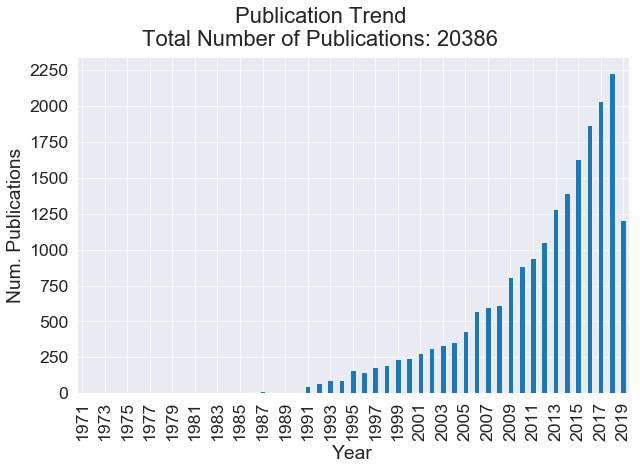

In [10]:
valid_DOI_RC = wosis.extract_recs(corpora_df.id, RC, name='DOI_removed')

wos_plot.plot_pub_trend(valid_DOI_RC, title='Publication Trend', save_plot_fn=FIG_DIR+'pub_trend.png', no_log_scale=True)

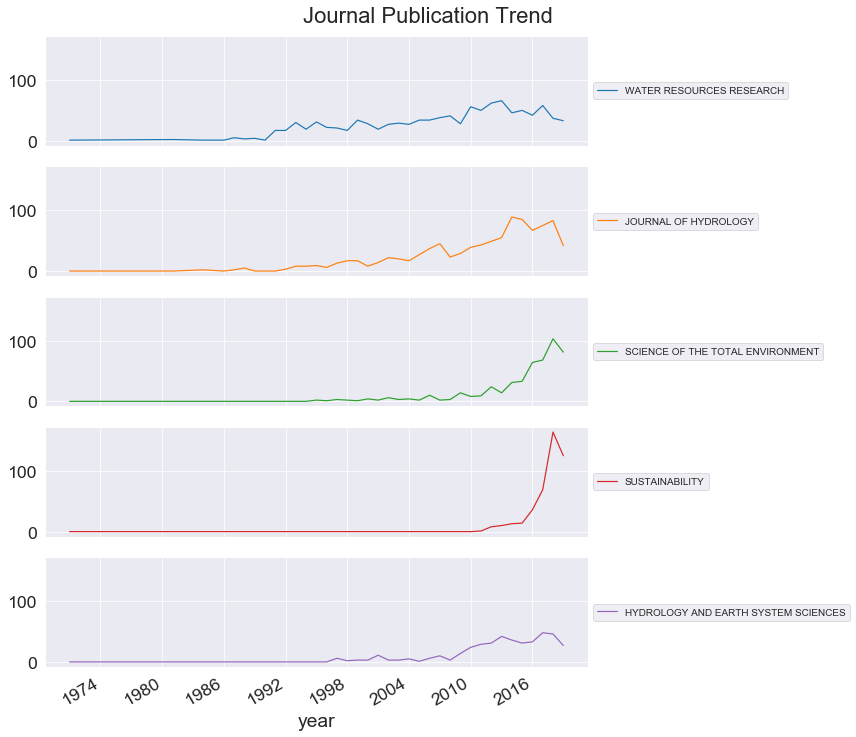

In [11]:
wos_plot.plot_journal_pub_trend(valid_DOI_RC, top_n=5)

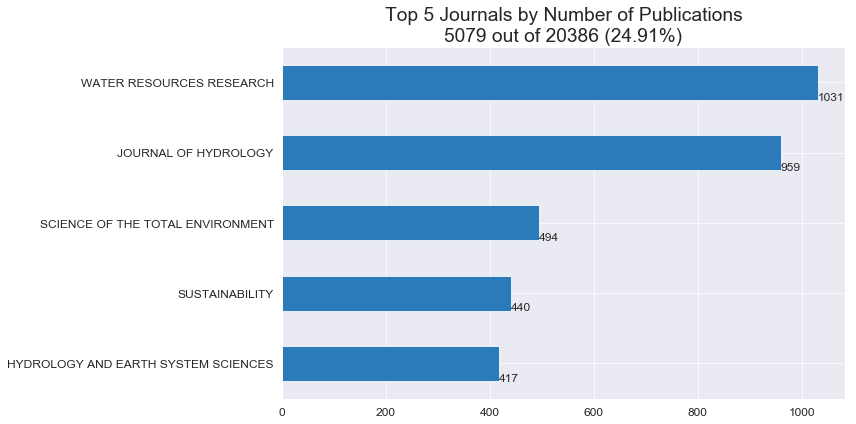

In [12]:
wos_plot.plot_pubs_per_journal(valid_DOI_RC, top_n=5, annotate=True, show_stats=True)

In [13]:
# Write data out for further analysis
valid_DOI_RC.writeFile(CACHE_DIR+'valid_DOI_corpora.dat')

<hr>

# Create representative data store

Dataset for publication cannot include WoS generated keywords or abstract text. It must also include attribution text.

In [18]:
from datetime import datetime

corpora = RC.forNLP(extraColumns=["AU", "SO", "DE"])
corpora_df = pd.DataFrame(corpora)

assert len(corpora_df.id.unique()) == len(corpora_df.id), "Duplicate records found!"

corpora_df.drop(["keywords", "abstract", "id"], inplace=True, axis=1)



corpora_fn = DATA_DIR+"{}.csv".format(query_id)
with open(corpora_fn, 'w') as fn:
    fn.write("# Data from Clarivate Analytics' Web of Science, retrieved 06 September 2019\n")
    fn.write("# This file generated on {}\n".format(datetime.now().strftime("%Y-%m-%d %H:%M:%S")))
    corpora_df.index.name = "item"
    corpora_df.to_csv(fn)